In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seattle-weather/seattle-weather.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


df= pd.read_csv('/kaggle/input/seattle-weather/seattle-weather.csv')
print(df.head())
print(df.info())
print(df.describe())

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None
       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.

In [3]:
# checking for null values
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [4]:
# Normalizing Data
scaler = StandardScaler()
numerical_features = ['precipitation', 'temp_max', 'wind']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# # Convert date column to datetime if it exists
# if 'date' in df.columns:
#     df['date'] = pd.to_datetime(df['date'])

# Feature-target split
X = df[['precipitation', 'temp_max', 'wind']]  # Assuming 'temperature' is the target variable
y = df['temp_max']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


# Developing model with random forest

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(rmse_rf)

print(f'Random Forest RMSE: {rmse_rf}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


Random Forest RMSE: 0.004183522658612103
Mean Absolute Error: 0.0005249119474792061
Root Mean Squared Error: 0.06468015660627378


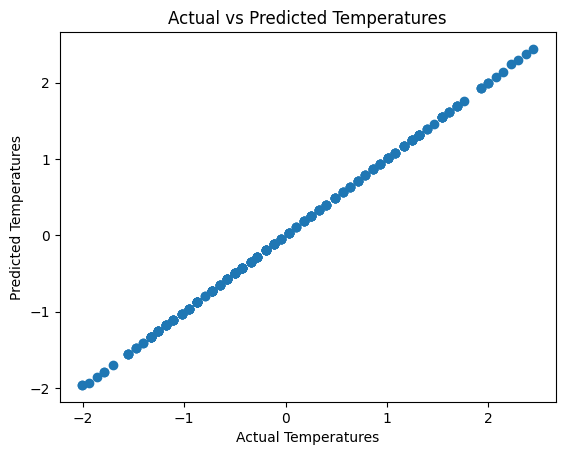

In [7]:
# Plot the results
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.title('Actual vs Predicted Temperatures')
plt.show()

# Timeseries with ARIMA

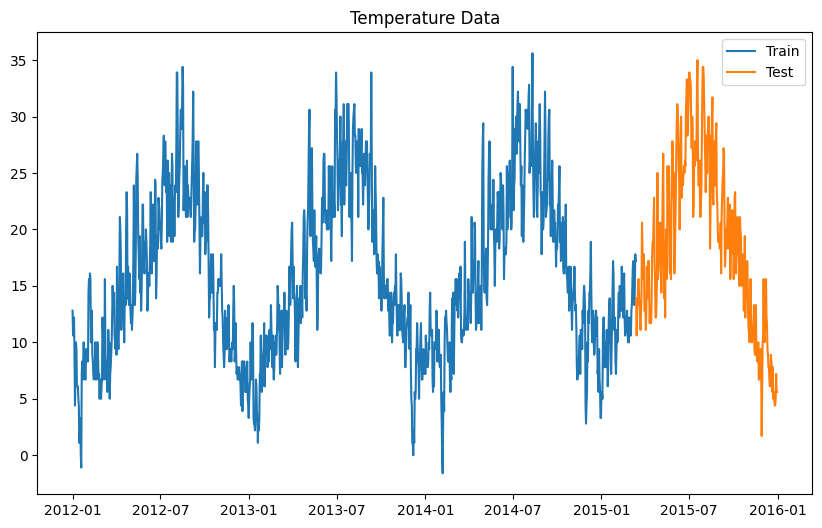

In [8]:
#arranging the data by month
df= pd.read_csv('/kaggle/input/seattle-weather/seattle-weather.csv', parse_dates=['date'], index_col='date')

temperature = df['temp_max']

# Split the data into training and testing sets
train_size = int(len(temperature) * 0.8)
train, test = temperature[:train_size], temperature[train_size:]


# Plot the training data
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.legend()
plt.title('Temperature Data')
plt.show()

In [9]:
from statsmodels.tsa.arima.model import ARIMA

#selecting ARIMA parameters
p, d, q = 5, 1, 0

# Train the ARIMA model
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))
predictions = pd.Series(predictions, index=test.index)

# Evaluate the model
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Absolute Error: 6.403861555807323
Mean Squared Error: 61.49593366822107
Root Mean Squared Error: 7.8419343065484215


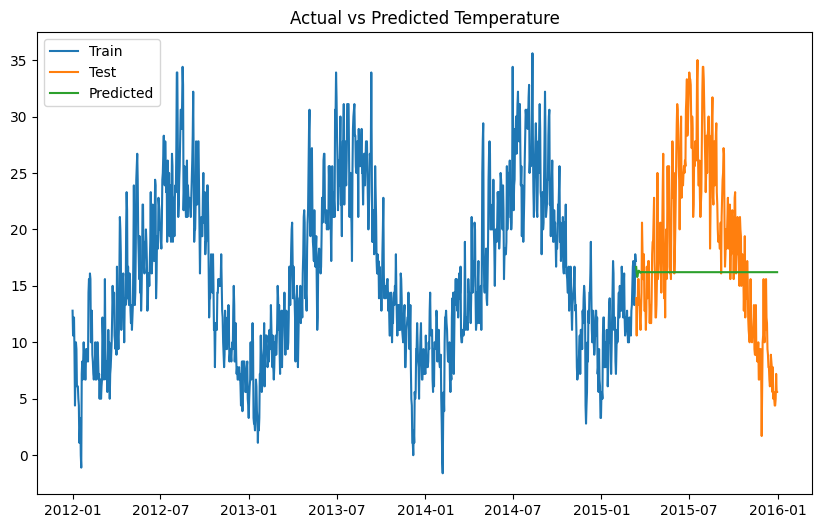

In [10]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Temperature')
plt.show()

# developing model with neuronetworks

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_pred_nn = nn_model.predict(X_test)

# Evaluation
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
print(f'Neural Network RMSE: {rmse_nn}')


2024-07-11 03:37:38.923799: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 03:37:38.923943: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 03:37:39.079230: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8206 - mae: 0.7423 - val_loss: 0.2973 - val_mae: 0.4151
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1847 - mae: 0.3024 - val_loss: 0.0359 - val_mae: 0.1470
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0288 - mae: 0.1257 - val_loss: 0.0132 - val_mae: 0.0884
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0094 - mae: 0.0672 - val_loss: 0.0052 - val_mae: 0.0518
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - mae: 0.0456 - val_loss: 0.0027 - val_mae: 0.0385
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027 - mae: 0.0372 - val_loss: 0.0018 - val_mae: 0.0328
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 - mae: 0.0318 - val_loss: 0.0014 - val_mae: 0.0288
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - mae: 0.0269 - val_loss: 0.0011 - val_mae: 0.0271
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 - mae: 0.0252 - va

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


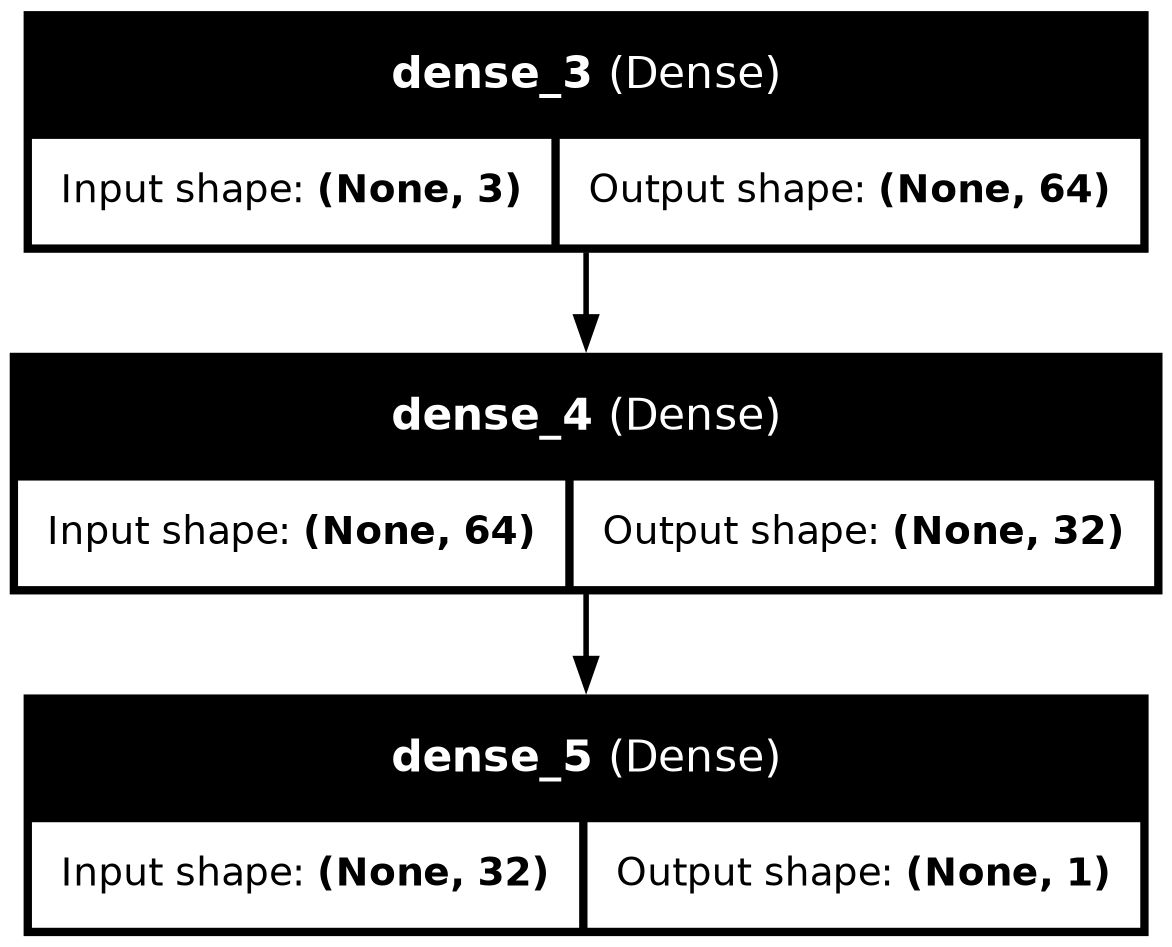

In [12]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Visualize the model
plot_model(nn_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


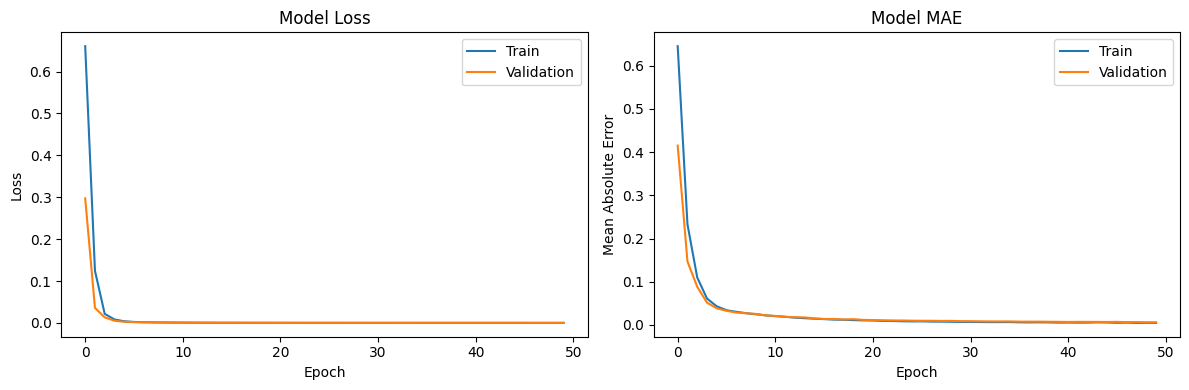

In [13]:

# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()
